## Image Transformations with BRCA dataset

### a. Plot the histogram of labels and plot an image from each label. Is this dataset imbalanced? Please briefly explain your answer. NOTE: load the image into an array using imageio.imread().

In [2]:
import numpy as np
import os
import cv2
import imageio.v2 as imageio
from scipy import ndimage
from matplotlib import pyplot as plt

In [4]:
# Loading the dataset
directory = 'C:\\Users\\sinad\\OneDrive - Georgia Institute of Technology\\BMED 6780 - Med Image Processing\\Programming Practicals\\Practical 1\\Image_data\\Image_data'
dir_path = os.path.abspath(directory)
print("The Images path is: ", dir_path)

# Load images and extract labels
image_files = os.listdir(dir_path)
labels = [filename.split('_')[0] for filename in image_files]
print(np.shape(image_files))
print(np.shape(labels))

The Images path is:  C:\Users\sinad\OneDrive - Georgia Institute of Technology\BMED 6780 - Med Image Processing\Programming Practicals\Practical 1\Image_data\Image_data
(300,)
(300,)


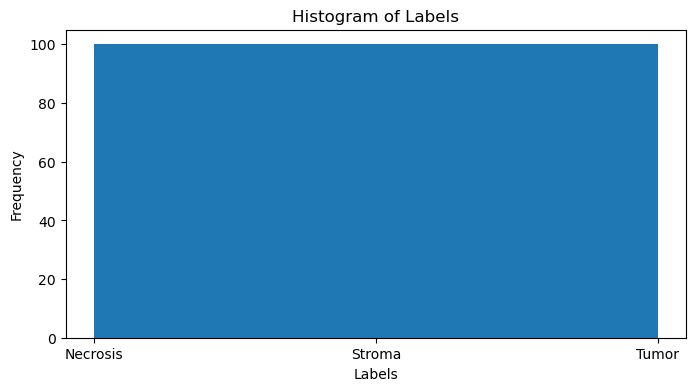

In [6]:
# Plot histogram of labels
plt.figure(figsize=(8, 4))
plt.hist(labels, bins=3)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Histogram of Labels')
plt.show()

In [8]:
# Check for imbalance
unique_labels = set(labels)
label_counts = {label: labels.count(label) for label in unique_labels}
print("Label Counts:", label_counts)

Label Counts: {'Necrosis': 100, 'Stroma': 100, 'Tumor': 100}


#### The dataset looks balanced! 

Necrosis_1.png
Stroma_1.png
Tumor_1.png


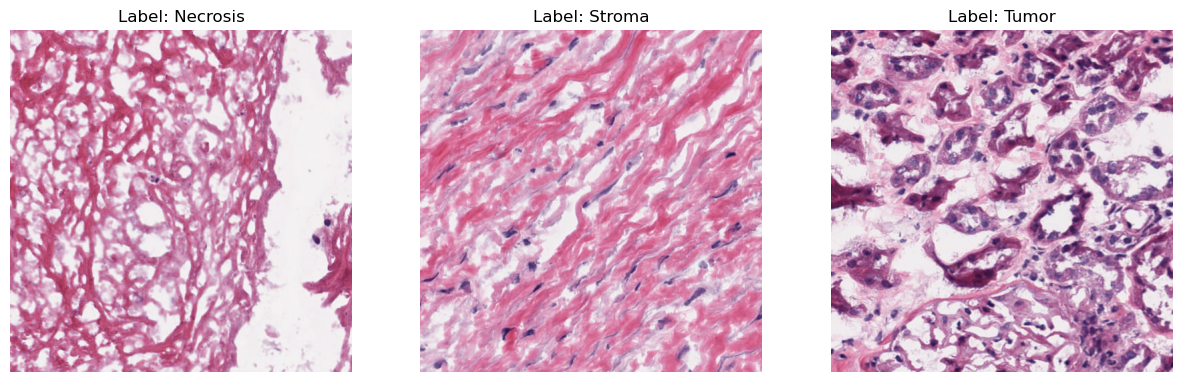

In [11]:
# Display an image from each label
plt.figure(figsize=(15, 10))
for i, label in enumerate(unique_labels):
    plt.subplot(1, 3, i+1)
    image_path = os.path.join(dir_path, [filename for filename in image_files if label in filename][0])
    print(image_path.split(sep="\\")[-1])
    img = imageio.imread(image_path)
    plt.imshow(img)
    plt.title('Label: ' + label)
    plt.axis('off')
plt.show()

### b. Use 90 degree rotations to generate a figure with the same image rotated by 90 degrees 3 times (eg. 0 deg, 90 deg, 180 deg, 270 deg rotations of the same image) (numpy.rot90).

Tumor_10.png


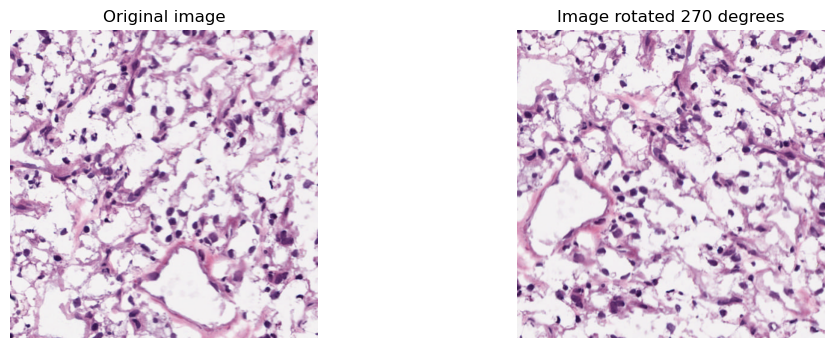

In [14]:
image_path = os.path.join(dir_path, [filename for filename in image_files if label in filename][1])
print(image_path.split(sep="\\")[-1])
img = imageio.imread(image_path)
img_rotated = np.rot90(img,3)
    
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_rotated)
plt.title('Image rotated 270 degrees')
plt.axis('off')
plt.show()

### c. Create two new images by shifting one of the images right by 100 pixels (shifted image 1) and another image up (shifted image 2) by 100 pixels (scipy.ndimage.shift).

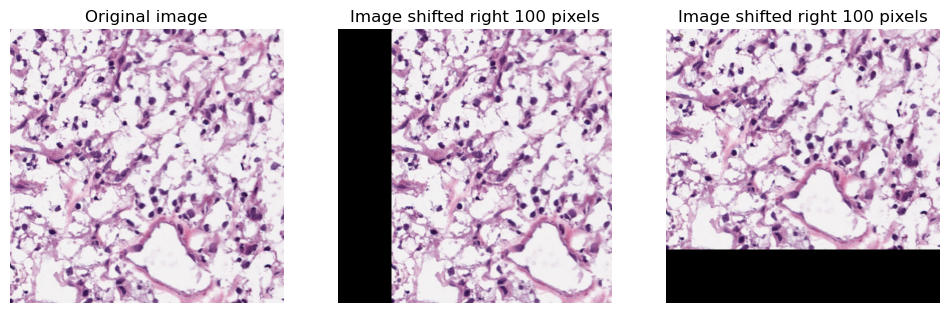

In [17]:
img_right_shifted = ndimage.shift(img,[0,100,0])
img_up_shifted = ndimage.shift(img,[-100,0,0])

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Original image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_right_shifted)
plt.title('Image shifted right 100 pixels')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_up_shifted)
plt.title('Image shifted right 100 pixels')
plt.axis('off')
plt.show()

### d. Add random uniform noise (np.random.rand) to an image (random values from 0 - 50) then rescale the image (0-255). 

#### Use Gaussian blurring (i.e. low pass filter) with 4 different “sigma” values (sigma=0.2, 0.5, 1, 5) to reduce the effect of noise in the image (scipy.ndimage.gaussian_filter). NOTE: only blur within channels,not across channels (e.g. sigma=[1,1,0]). 

#### Plot the original image alongside the noisy and the four final (blurred) images (6 images total). Which blurring sigma was best?Explain how this option was chosen.

In [68]:
print(img.dtype)

uint8


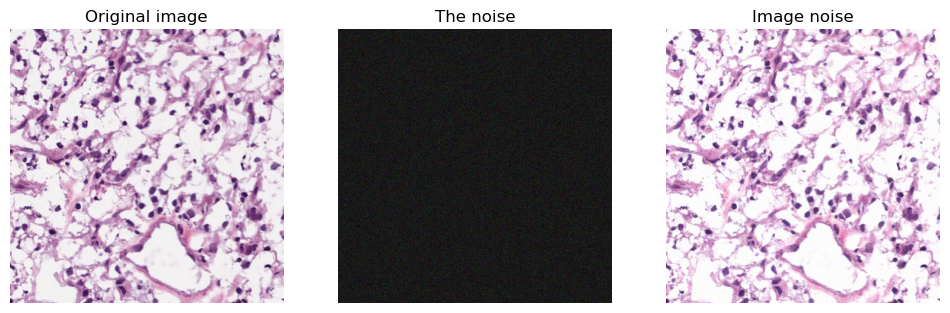

In [51]:
# adding noise

noise_level = 50
noise = np.random.rand(*img.shape) * noise_level

# print(noise)
noisy_image = np.clip(img + noise, 0, 255).astype(np.uint8)

rescaled_image = (noisy_image- np.min(noisy_image)) / (np.max(noisy_image)- np.min(noisy_image)) *255
rescaled_image = rescaled_image.astype(np.uint8)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Original image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(noise.astype(np.uint8));
plt.title('The noise')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(rescaled_image);
plt.title('Image noise')
plt.axis('off')
plt.show()

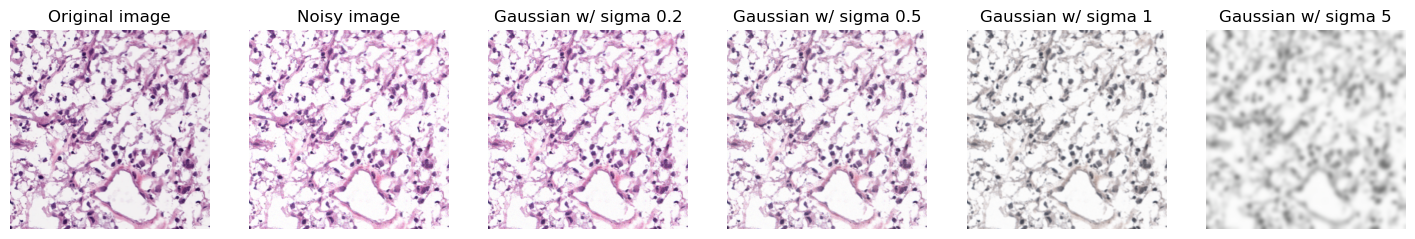

In [53]:
# Gaussian Bluring with sigma = 0.2, 0.5, 1, 5

# img_Gauss1 = cv2.GaussianBlur(rescaled_image, (5,5),0.2)
# img_Gauss2 = cv2.GaussianBlur(rescaled_image, (5,5),0.5)
# img_Gauss3 = cv2.GaussianBlur(rescaled_image, (5,5),1)
# img_Gauss4 = cv2.GaussianBlur(rescaled_image, (5,5),5)

img_Gauss1 = ndimage.gaussian_filter(rescaled_image, sigma=0.2)
img_Gauss2 = ndimage.gaussian_filter(rescaled_image, sigma=0.5)
img_Gauss3 = ndimage.gaussian_filter(rescaled_image, sigma=1)
img_Gauss4 = ndimage.gaussian_filter(rescaled_image, sigma=5)

plt.figure(figsize=(18,8))
plt.subplot(1,6,1)
plt.imshow(img)
plt.title('Original image')
plt.axis('off')

plt.subplot(1,6,2)
plt.imshow(rescaled_image)
plt.title('Noisy image')
plt.axis('off')

plt.subplot(1,6,3)
plt.imshow(img_Gauss1);
plt.title('Gaussian w/ sigma 0.2')
plt.axis('off')

plt.subplot(1,6,4)
plt.imshow(img_Gauss2);
plt.title('Gaussian w/ sigma 0.5')
plt.axis('off')

plt.subplot(1,6,5)
plt.imshow(img_Gauss3);
plt.title('Gaussian w/ sigma 1')
plt.axis('off')

plt.subplot(1,6,6)
plt.imshow(img_Gauss4);
plt.title('Gaussian w/ sigma 5')
plt.axis('off')
plt.show()

##### Comparing the different sigma levels correction of noisy image, the lower the sigma the close it looks to the original image. High sigma of 1 and 5 blurs the image too much and we loos too much the fine details.

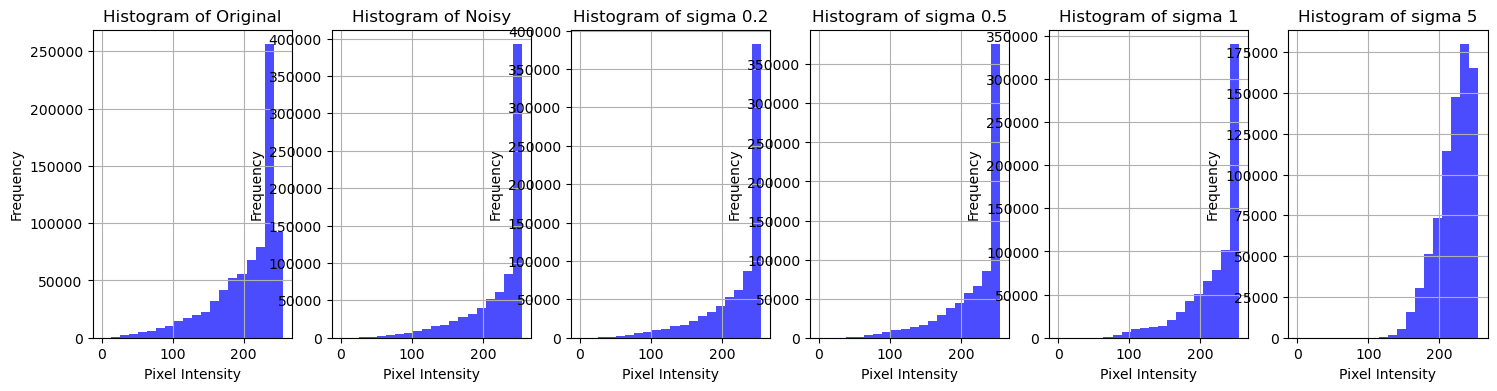

In [55]:

plt.figure(figsize=(18,4))
plt.subplot(1,6,1)
plt.hist(img.flatten(), bins=20, range=(0, 255), color='blue', alpha=0.7)
plt.title('Histogram of Original')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1,6,2)
plt.hist(rescaled_image.flatten(), bins=20, range=(0, 255), color='blue', alpha=0.7)
plt.title('Histogram of Noisy')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1,6,3)
plt.hist(img_Gauss1.flatten(), bins=20, range=(0, 255), color='blue', alpha=0.7)
plt.title('Histogram of sigma 0.2')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1,6,4)
plt.hist(img_Gauss2.flatten(), bins=20, range=(0, 255), color='blue', alpha=0.7)
plt.title('Histogram of sigma 0.5')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1,6,5)
plt.hist(img_Gauss3.flatten(), bins=20, range=(0, 255), color='blue', alpha=0.7)
plt.title('Histogram of sigma 1')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1,6,6)
plt.hist(img_Gauss4.flatten(), bins=20, range=(0, 255), color='blue', alpha=0.7)
plt.title('Histogram of sigma 5')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Also from the histograms we can tell that sigma of 1 and especially 5 have lost the middle range pixel vales and mostly has bright pixels. 